Load the segmentation image, and the corresponding CT image with PyDicom. Rearrange
the image and segmentation ‘pixel array’ given by PyDicom based on the headers. Some
relevant headers include:
* ‘Acquisition Number’.
* ‘Slice Index’.
* ‘Per-frame Functional Groups Sequence’ --> ‘Image Position Patient’.
* ‘Segment Identification Sequence’ -->  ‘Referenced Segment Number’.

### c) Load the segmentation image, and the corresponding CT image with PyDicom. Rearrange the image and segmentation ‘pixel array’ given by PyDicom based on the headers. Some relevant headers include:
* ‘Acquisition Number’.
* ‘Slice Index’.
* ‘Per-frame Functional Groups Sequence’ --> ‘Image Position Patient’.
* ‘Segment Identification Sequence’ --> ‘Referenced Segment Number’.

## Carga y visualización de imágenes DICOM

Libraries

In [38]:
import numpy as np
import pydicom
import matplotlib.pyplot as plt
import os


Functions for load and visualise images

In [46]:
def load_dicom_images(directory):
    
    dicom_images = [] # Lista para almacenar los objetos DICOM
    
    # Recorrer los archivos en el directorio
    for file_name in sorted(os.listdir(directory)):
        if file_name.endswith('.dcm'):
            # Construir la ruta completa del archivo
            file_path = os.path.join(directory, file_name)
            # Cargar el archivo DICOM
            dicom_image = pydicom.dcmread(file_path)
            dicom_images.append(dicom_image)
    
    return dicom_images

def visualize_dicom_images(dicom_images):
    # Revisar si estamos tratando con múltiples cortes en una sola imagen
    if len(dicom_images) == 1 and len(dicom_images[0].pixel_array.shape) == 3:
        # Supongamos que tenemos múltiples cortes en la misma imagen DICOM
        num_slices = dicom_images[0].pixel_array.shape[0]
        fig, axes = plt.subplots(1, num_slices, figsize=(20, 10))
        for i, ax in enumerate(axes):
            ax.imshow(dicom_images[0].pixel_array[i], cmap='gray')
            ax.axis('off')
        plt.show()
    else:
        fig, axes = plt.subplots(1, len(dicom_images), figsize=(20, 10))
        for ax, dicom_image in zip(axes, dicom_images):
            ax.imshow(dicom_image.pixel_array, cmap='gray')
            ax.axis('off')
        plt.show()

Visualisation

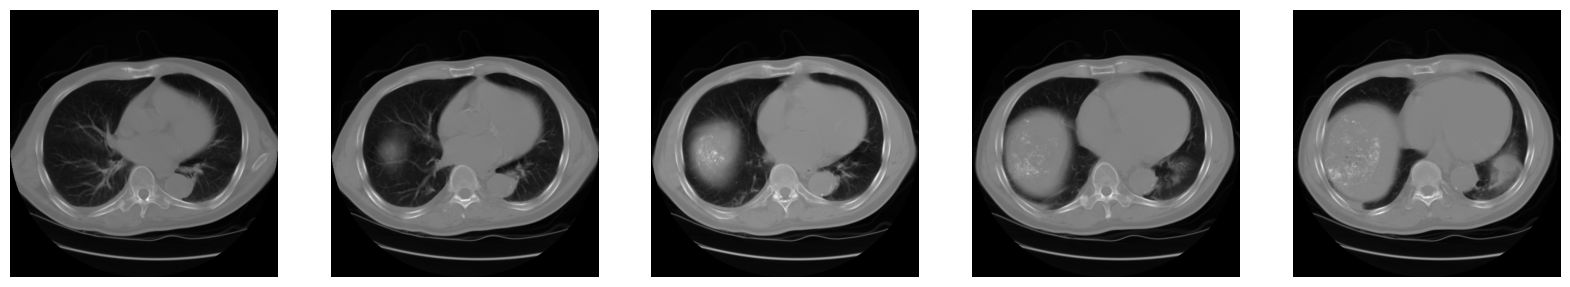

In [50]:
# Rutas a los directorios que contienen los archivos DICOM de CT y segmentación
segmentation_directory_path = '/Users/pedromarti/Desktop/Master/AIM/Practica/HCC_007/manifest-1643035385102/HCC-TACE-Seg/HCC_007/12-27-1997-NA-AP LIVER PRT WWO-67834/300.000000-Segmentation-39839'
ct_directory_path = '/Users/pedromarti/Desktop/Master/AIM/Practica/HCC_007/manifest-1643035385102/HCC-TACE-Seg/HCC_007/03-14-1998-NA-CT ABDOMEN WWO CONT-48924/2.000000-PRE LIVER-48636'

# Cargar las imágenes DICOM
ct_images = load_dicom_images(ct_directory_path)
segmentation_images = load_dicom_images(segmentation_directory_path)

# Visualizar las primeras 5 imágenes DICOM de CT
visualize_dicom_images(ct_images[:5])

# Si hay imágenes de segmentación, visualizarlas
if segmentation_images:
    visualize_dicom_images(segmentation_images)

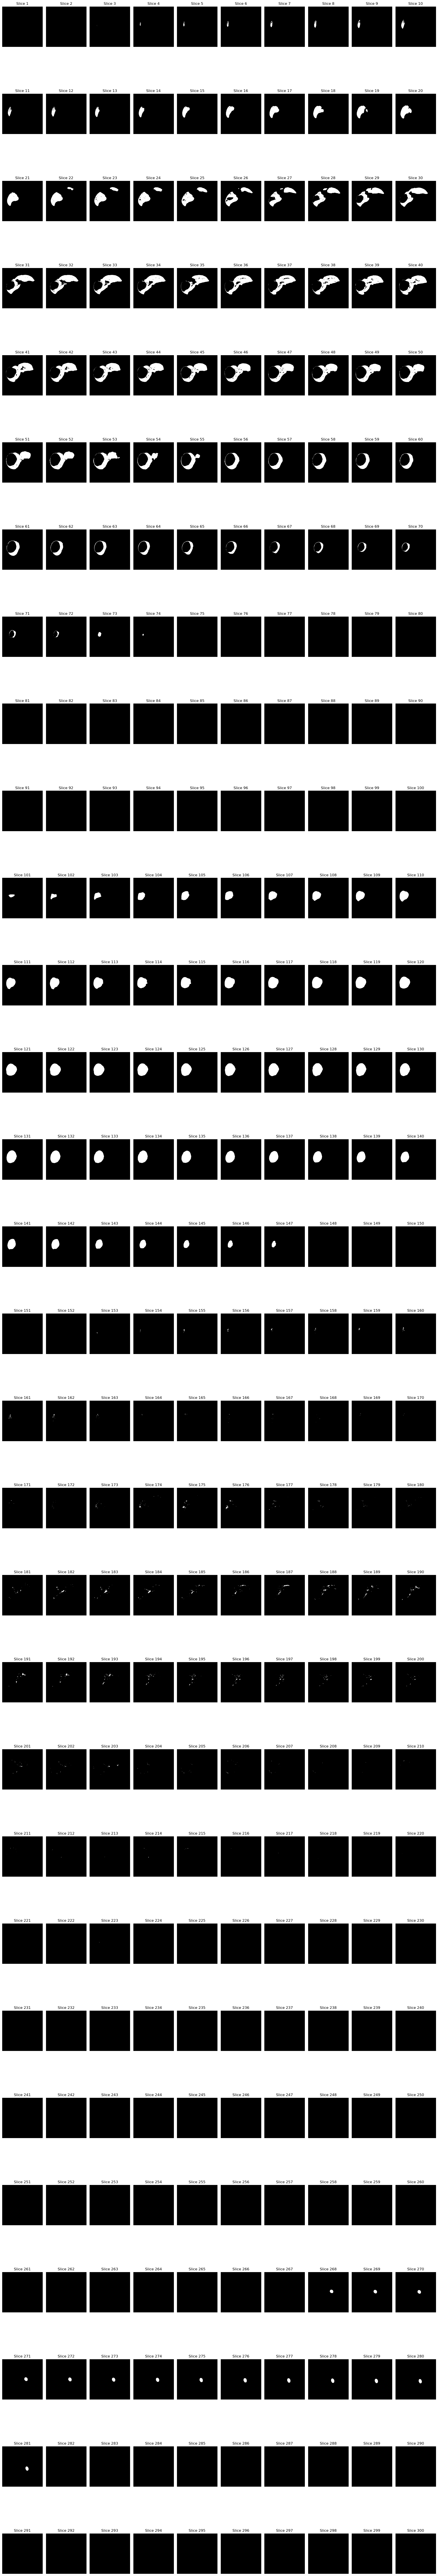

In [52]:
def load_single_dicom_image(file_path):
    return pydicom.dcmread(file_path)

def visualize_slices(dicom_image):
    # Asumimos que el pixel_array es 3D: (slices, height, width)
    slices = dicom_image.pixel_array
    num_slices = slices.shape[0]
    
    # Crear una figura con subplots
    cols = min(10, num_slices)  # Limitar el número de columnas a 10 para visibilidad
    rows = num_slices // cols + (num_slices % cols > 0)
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 4 * rows))
    
    # Aplanar el arreglo de axes para manejo simple
    axes = axes.flatten()
    
    # Mostrar cada corte
    for i in range(num_slices):
        ax = axes[i]
        ax.imshow(slices[i], cmap='gray')
        ax.axis('off')
        ax.set_title(f'Slice {i+1}')
    
    # Ocultar subplots vacíos si los hay
    for i in range(num_slices, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Ruta al archivo DICOM de segmentación
segmentation_file_path = '/Users/pedromarti/Desktop/Master/AIM/Practica/HCC_007/manifest-1643035385102/HCC-TACE-Seg/HCC_007/12-27-1997-NA-AP LIVER PRT WWO-67834/300.000000-Segmentation-39839/1-1.dcm'

# Cargar y visualizar el archivo de segmentación
segmentation_image = load_single_dicom_image(segmentation_file_path)
visualize_slices(segmentation_image)


#### Reorganización de las imágenes basada en los metadatos DICOM

In [54]:
def load_and_sort_dicom_images(directory):
    dicom_images = []
    for file_name in sorted(os.listdir(directory)):
        if file_name.endswith('.dcm'):
            file_path = os.path.join(directory, file_name)
            dicom_image = pydicom.dcmread(file_path)
            dicom_images.append(dicom_image)
    
    # Ordenar las imágenes por 'Image Position Patient', que es un valor en 3D
    dicom_images.sort(key=lambda x: x.ImagePositionPatient[2])
    return dicom_images

def visualize_ordered_slices(dicom_images):
    # Visualizar para verificar el orden correcto
    fig, axes = plt.subplots(1, 5, figsize=(20, 10))  # Visualizar solo las primeras 5 para verificar
    for ax, dicom_image in zip(axes, dicom_images[:5]):
        ax.imshow(dicom_image.pixel_array, cmap='gray')
        ax.set_title(f"Z-pos: {dicom_image.ImagePositionPatient[2]}")
        ax.axis('off')
    plt.show()

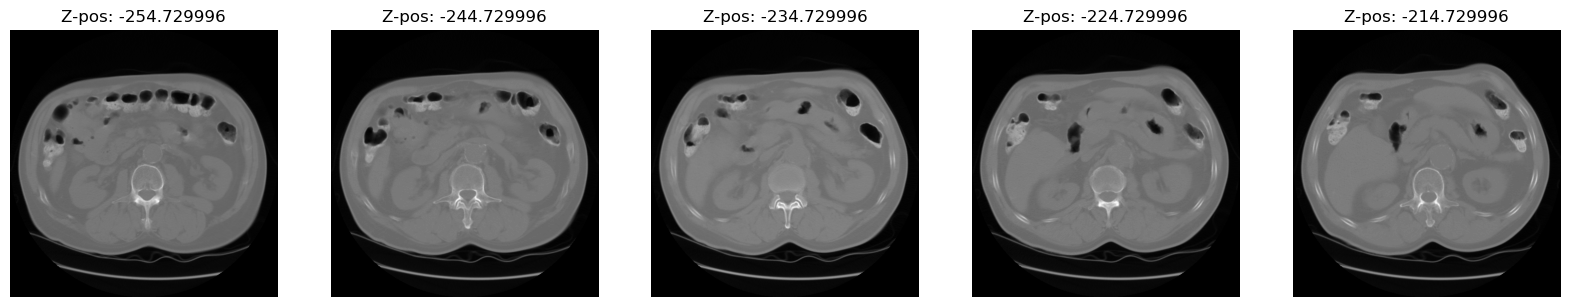

In [56]:
# Cargar y ordenar las imágenes DICOM
ordered_ct_images = load_and_sort_dicom_images(ct_directory_path)

# Visualizar para asegurarnos de que están en orden
visualize_ordered_slices(ordered_ct_images)

In [58]:
def load_dicom_images(directory, key_sort):
    dicom_images = []
    acquisition_numbers = set()

    for file_name in sorted(os.listdir(directory)):
        if file_name.endswith('.dcm'):
            file_path = os.path.join(directory, file_name)
            dicom_image = pydicom.dcmread(file_path)

            # Revisar si todas las imágenes provienen de la misma adquisición
            acquisition_numbers.add(dicom_image.AcquisitionNumber)
            dicom_images.append(dicom_image)
    
    # Asegurarse de que todas las imágenes provienen de una única adquisición
    if len(acquisition_numbers) > 1:
        raise ValueError("Multiple acquisition numbers found. All images must be from a single acquisition.")

    # Ordenar las imágenes por el header especificado
    dicom_images.sort(key=lambda x: x.ImagePositionPatient[2])
    return dicom_images

def visualize_ordered_slices(dicom_images, key_sort):
    fig, axes = plt.subplots(1, 5, figsize=(20, 10))  # Visualizar solo las primeras 5 para verificar
    for ax, dicom_image in zip(axes, dicom_images[:5]):
        ax.imshow(dicom_image.pixel_array, cmap='gray')
        ax.set_title(f"{key_sort}: {getattr(dicom_image, key_sort)}")
        ax.axis('off')
    plt.show()

# Configuración de rutas y parámetros de carga
segmentation_directory_path = '/Users/pedromarti/Desktop/Master/AIM/Practica/HCC_007/manifest-1643035385102/HCC-TACE-Seg/HCC_007/12-27-1997-NA-AP LIVER PRT WWO-67834/300.000000-Segmentation-39839'
ct_directory_path = '/Users/pedromarti/Desktop/Master/AIM/Practica/HCC_007/manifest-1643035385102/HCC-TACE-Seg/HCC_007/03-14-1998-NA-CT ABDOMEN WWO CONT-48924/2.000000-PRE LIVER-48636'

# Cargar y ordenar las imágenes DICOM usando 'ImagePositionPatient' y 'ReferencedSegmentNumber'
ordered_ct_images = load_dicom_images(ct_directory_path, 'ImagePositionPatient')
ordered_segmentation_images = load_dicom_images(segmentation_directory_path, 'ReferencedSegmentNumber')

# Visualizar para asegurarnos de que están en orden
visualize_ordered_slices(ordered_ct_images, 'ImagePositionPatient')
visualize_ordered_slices(ordered_segmentation_images, 'ReferencedSegmentNumber')


TypeError: '<' not supported between instances of 'MultiValue' and 'MultiValue'

## ----------------------------------------------------------------------------------

In [37]:


# Rutas de las imágenes
segmented_image_path = '/Users/pedromarti/Desktop/Master/AIM/Practica/HCC_007/manifest-1643035385102/HCC-TACE-Seg/HCC_007/12-27-1997-NA-AP LIVER PRT WWO-67834/300.000000-Segmentation-39839/1-1.dcm'
#ct_image_path = '/Users/pedromarti/Desktop/Master/AIM/Practica/HCC_007/manifest-1643035385102/HCC-TACE-Seg/HCC_007/03-14-1998-NA-CT ABDOMEN WWO CONT-48924/4.000000-Recon 2 3 PHASE LIVER ABD-87008/1-001.dcm'
ct_images_dir = '/Users/pedromarti/Desktop/Master/AIM/Practica/HCC_007/manifest-1643035385102/HCC-TACE-Seg/HCC_007/03-14-1998-NA-CT ABDOMEN WWO CONT-48924/2.000000-PRE LIVER-48636'

# Cargar las imágenes
segmentation_image = pydicom.dcmread(segmented_image_path) # Cargar imagen de segmentación

# Cargar imágenes de CT
ct_files = [f for f in os.listdir(ct_images_dir) if f.endswith('.dcm')]
ct_images = [pydicom.dcmread(os.path.join(ct_images_dir, f)) for f in ct_files]

# Organización de imágenes CT según 'Image Position Patient'
ct_images.sort(key=lambda x: float(x.ImagePositionPatient[2]))

# Mostrar detalles relevantes
print("Details of CT images sorted by Image Position Patient:")
for img in ct_images:
    print(f"Acquisition Number: {img.AcquisitionNumber}, Image Position Patient: {img.ImagePositionPatient}")

# Preparación de arrays de píxeles
segmentation_array = segmentation_image.pixel_array
ct_arrays = np.stack([img.pixel_array for img in ct_images])

print("Dimensiones del arreglo de segmentación:", segmentation_array.shape)
print("Dimensiones del arreglo de imágenes CT:", ct_arrays.shape)

Details of CT images sorted by Image Position Patient:
Acquisition Number: 1, Image Position Patient: [-203.500000, -180.000000, -254.729996]
Acquisition Number: 1, Image Position Patient: [-203.500000, -180.000000, -244.729996]
Acquisition Number: 1, Image Position Patient: [-203.500000, -180.000000, -234.729996]
Acquisition Number: 1, Image Position Patient: [-203.500000, -180.000000, -224.729996]
Acquisition Number: 1, Image Position Patient: [-203.500000, -180.000000, -214.729996]
Acquisition Number: 1, Image Position Patient: [-203.500000, -180.000000, -204.729996]
Acquisition Number: 1, Image Position Patient: [-203.500000, -180.000000, -194.729996]
Acquisition Number: 1, Image Position Patient: [-203.500000, -180.000000, -184.729996]
Acquisition Number: 1, Image Position Patient: [-203.500000, -180.000000, -174.729996]
Acquisition Number: 1, Image Position Patient: [-203.500000, -180.000000, -164.729996]
Acquisition Number: 1, Image Position Patient: [-203.500000, -180.000000, -

## Visualización

#### Pregunta: ¿Hem d'aplicar una transformació d'intensitat per a que l'image es visualitzi millor (Windowing)? T2 pg 28-33

Visualización de correspondencias

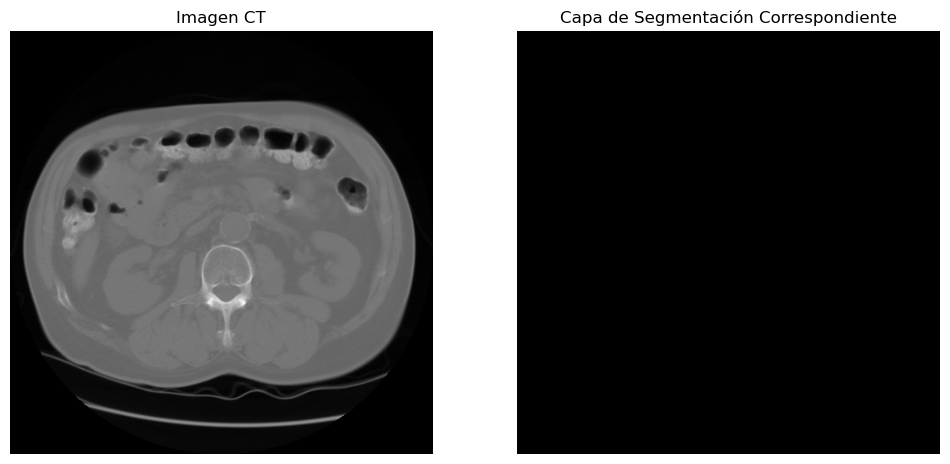

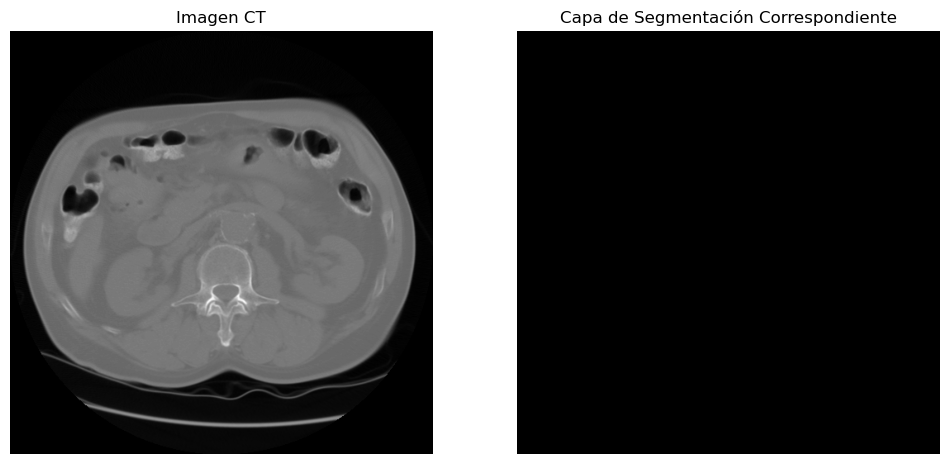

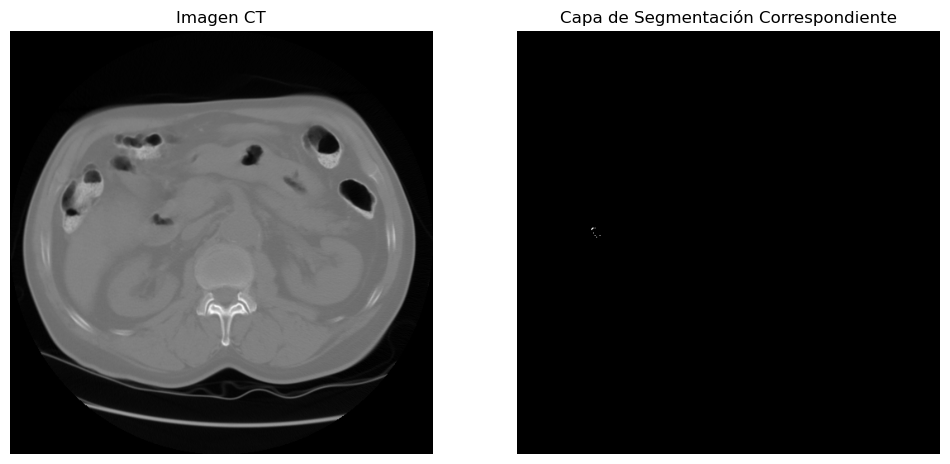

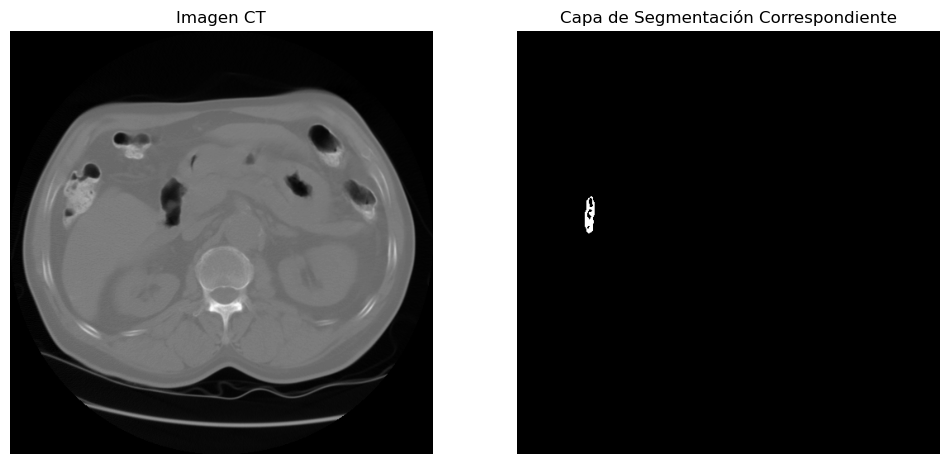

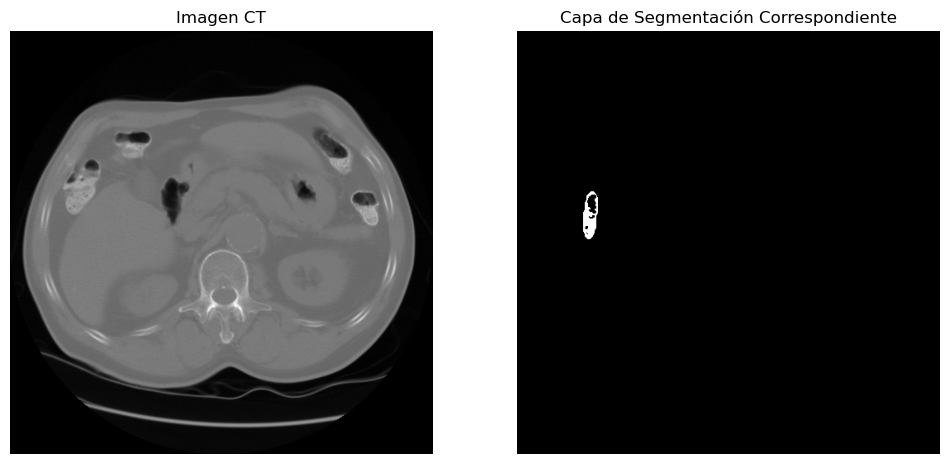

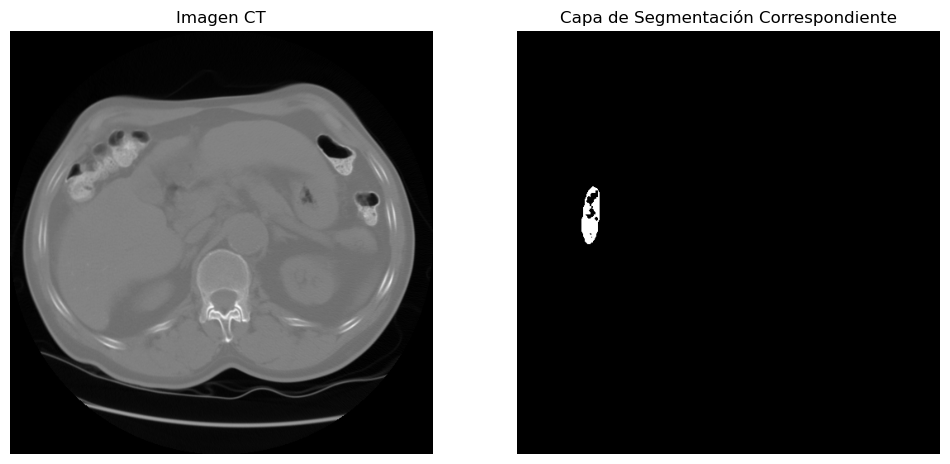

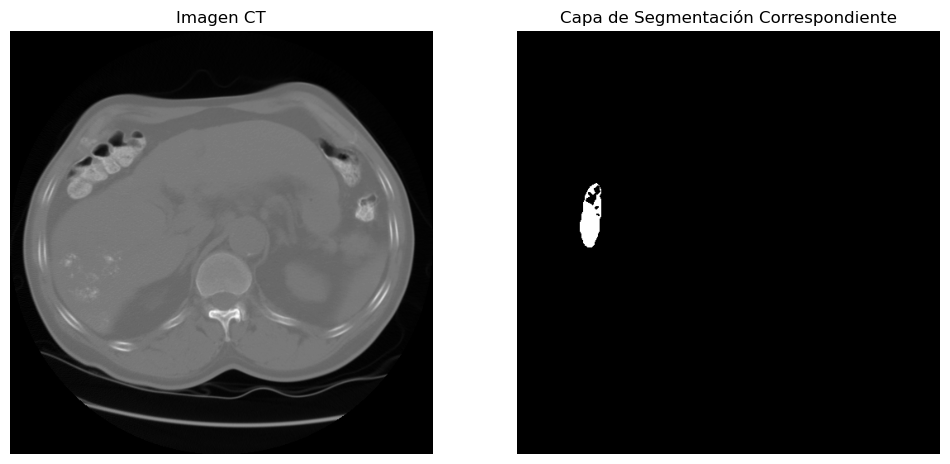

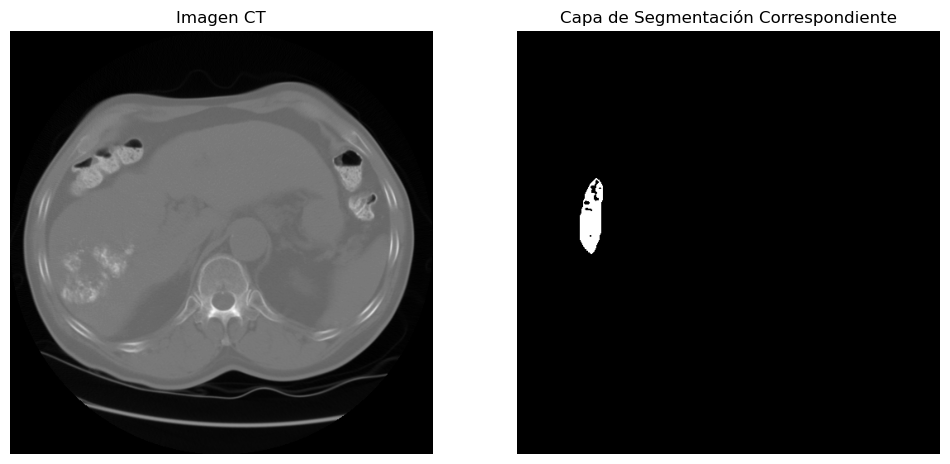

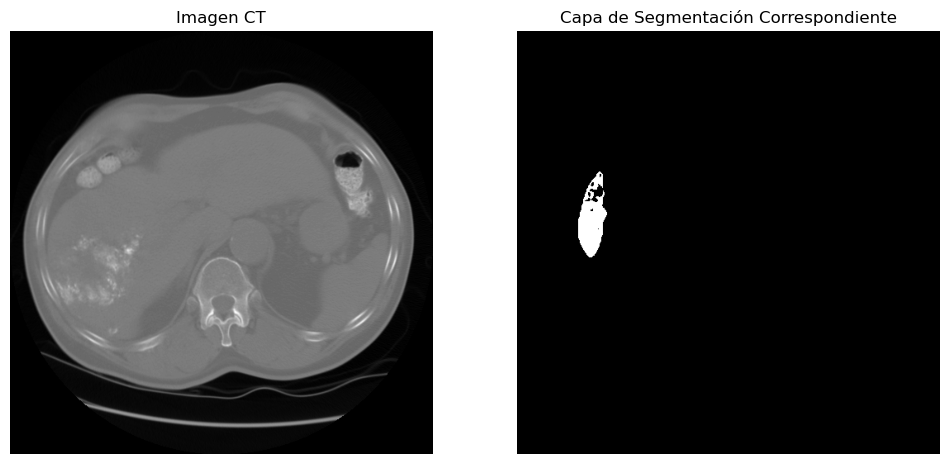

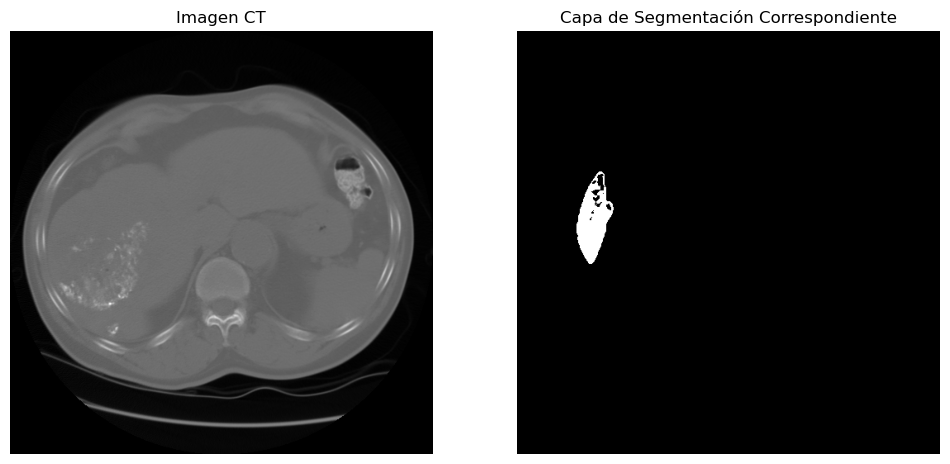

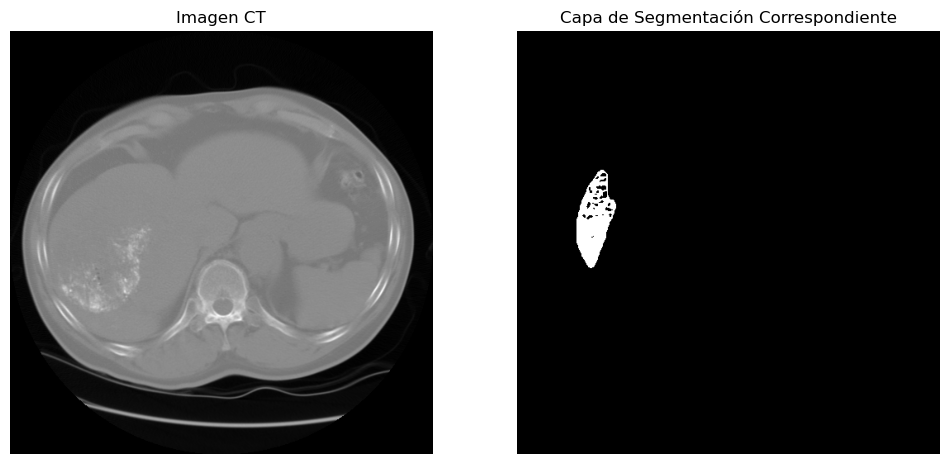

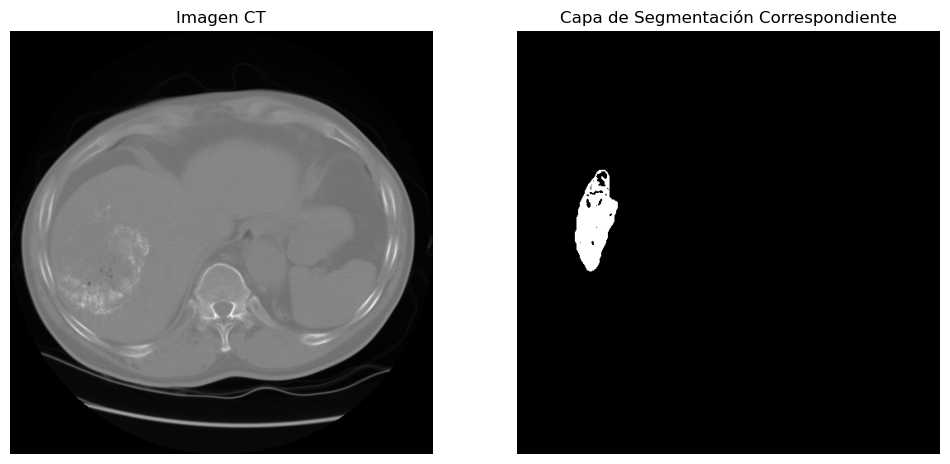

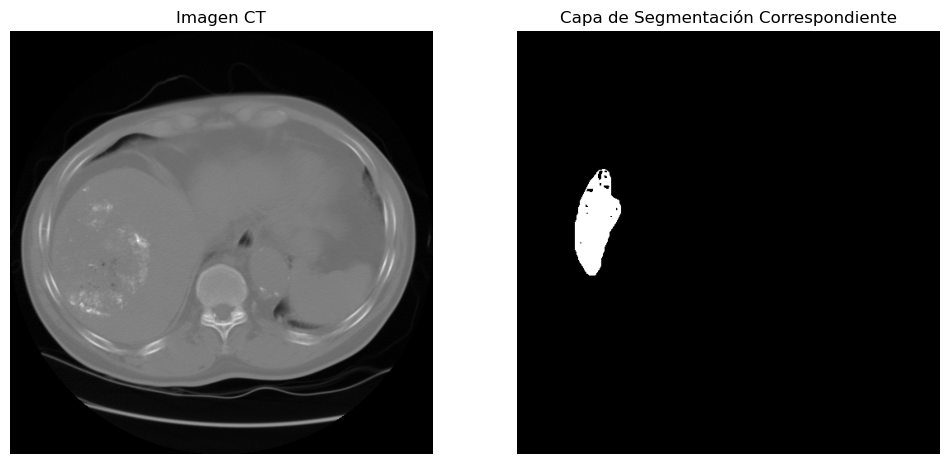

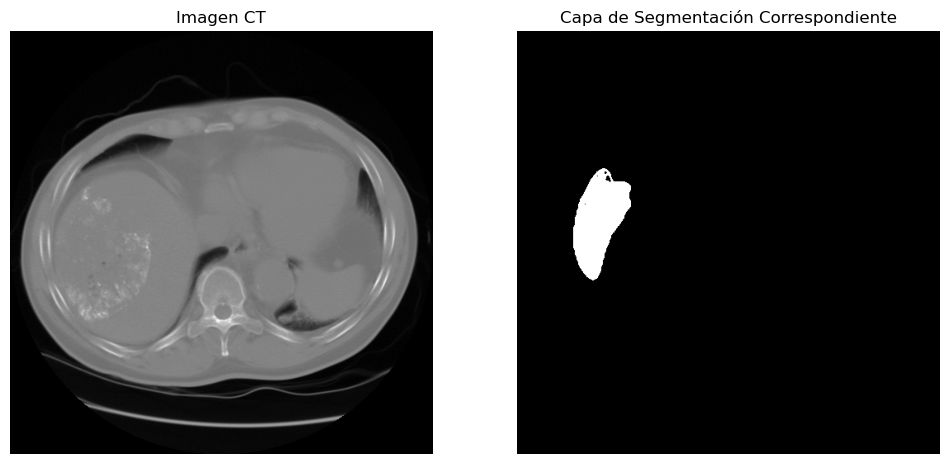

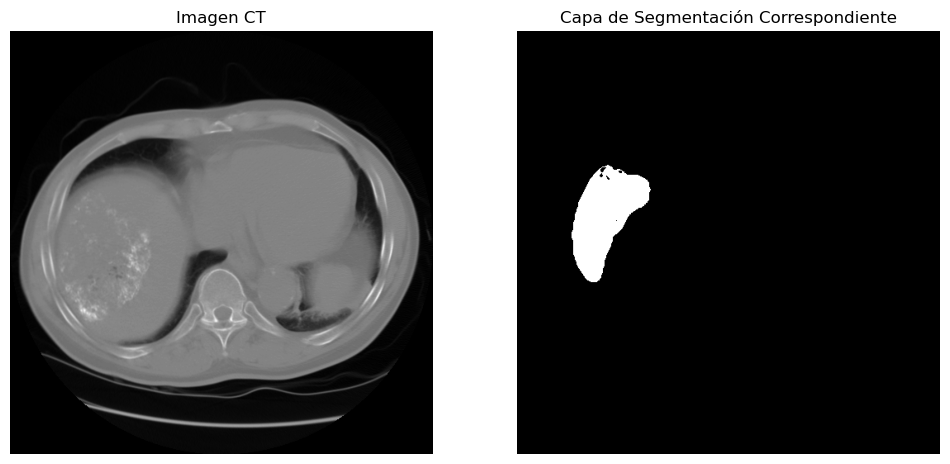

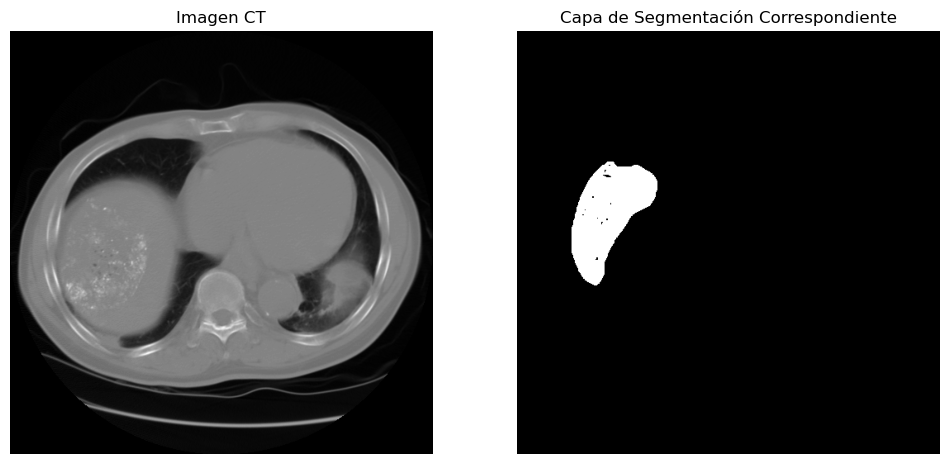

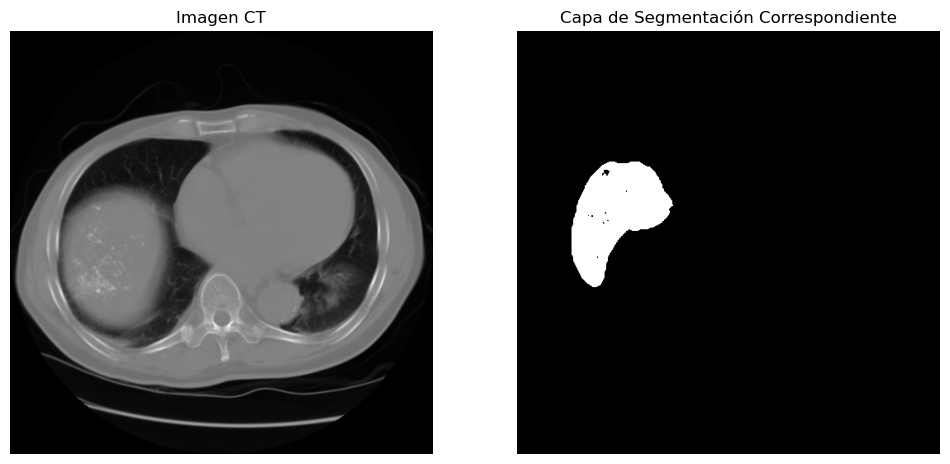

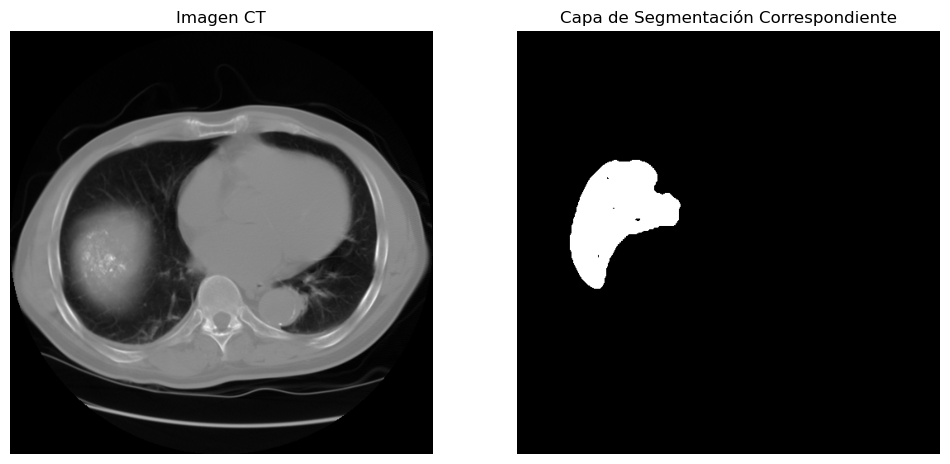

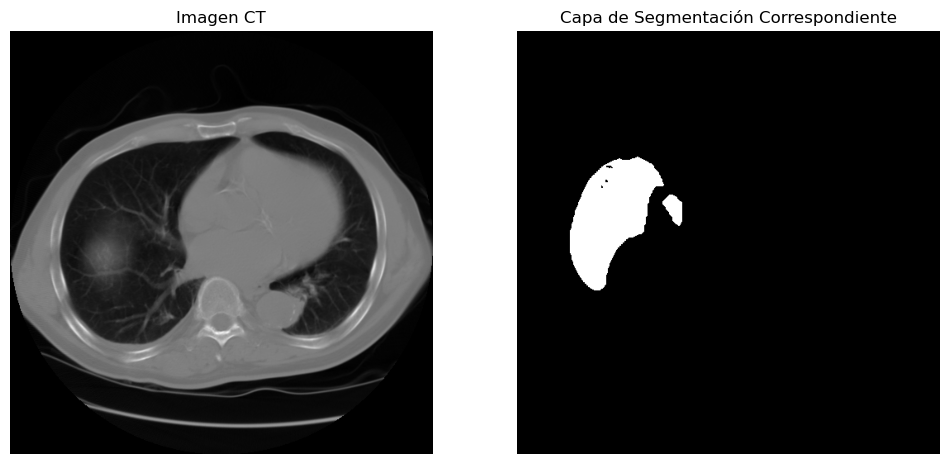

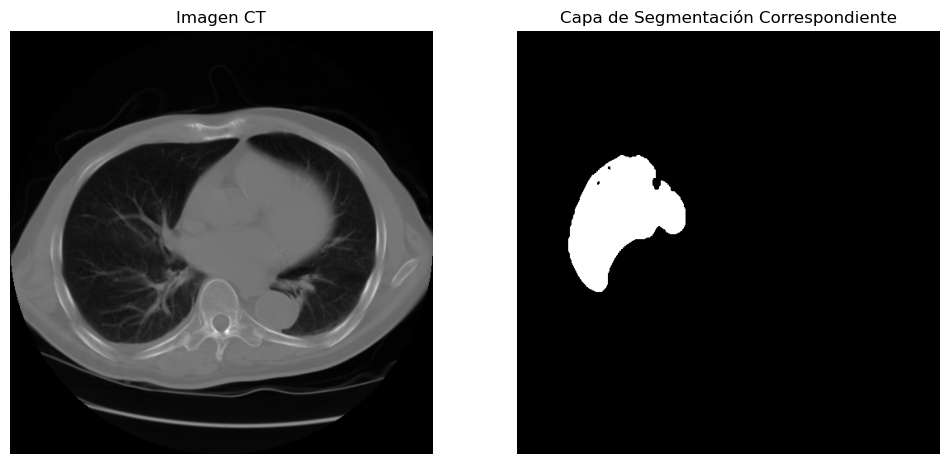

In [30]:
import matplotlib.pyplot as plt

# Función para visualizar imágenes CT y de segmentación
def plot_images(ct_image, segmentation_layer):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(ct_image, cmap='gray')
    ax[0].set_title('Imagen CT')
    ax[0].axis('off')

    ax[1].imshow(segmentation_layer, cmap='gray')
    ax[1].set_title('Capa de Segmentación Correspondiente')
    ax[1].axis('off')

    plt.show()

# Suponiendo que cada capa de segmentación corresponde directamente a cada imagen CT (esto es solo un ejemplo)
for i in range(len(ct_arrays)):
    plot_images(ct_arrays[i], segmentation_array[i])


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import imageio

In [ ]:
# Suponiendo que `image_data` es un array 3D con las dimensiones de las imágenes
# Crear MIPs en los planos requeridos
mip_coronal = np.max(image_data, axis=0)
mip_sagital = np.max(image_data, axis=1)

# Generar imágenes para el GIF
images = []
angles = range(0, 360, 10)
for angle in angles:
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(mip_coronal, cmap='gray', origin='lower')
    ax[1].imshow(mip_sagital, cmap='gray', origin='lower')
    
    # Rotar la imagen
    ax[0].view_init(30, angle)
    ax[1].view_init(30, angle)
    
    # Convertir el plot en imagen para añadirlo al array de imágenes
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)
    plt.close(fig)

# Guardar imágenes como GIF
imageio.mimsave('rotating_mip.gif', images, fps=10)


## Corregistration

In [ ]:
import numpy as np

# Definir la matriz de transformación para la traslación
def translate_image(image, offset):
    translated_image = np.roll(image, shift=offset, axis=(0,1))  # Traslada en ambos ejes
    return translated_image

# Aplicar la traslación
offset = [10, 10]  # Desplazar 10 píxeles en x e y
translated_image = translate_image(image_data, offset)

# Mostrar la imagen trasladada
plt.imshow(translated_image, cmap='gray')
plt.title("Translated Image")
plt.axis('off')
plt.show()